In [2]:
!pip install git+https://github.com/facebookresearch/segment-anything.git


  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-9burbpdw
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-9burbpdw
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=bcd1e4172995e9497d3d8406f5e8203ad53f666f5cbe2cfe1c651312c7550e42
  Stored in directory: /tmp/pip-ephem-wheel-cache-pz2asjnx/wheels/15/d7/bd/05f5f23b7dcbe70cbc6783b06f12143b0cf1a5da5c7b52dcc5
Successfully built segment_anything


In [5]:
import segment_anything
print("✅ segment_anything module is installed successfully!")

✅ segment_anything module is installed successfully!


In [6]:
!wget -O /content/sam_vit_b_01ec64.pth https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth


--2025-02-28 08:39:44--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.167.112.66, 3.167.112.129, 3.167.112.53, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.167.112.66|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375042383 (358M) [binary/octet-stream]
Saving to: ‘/content/sam_vit_b_01ec64.pth’

/content/sam_vit_b_ 100%[===================>] 357.67M   172MB/s    in 2.1s    

2025-02-28 08:39:46 (172 MB/s) - ‘/content/sam_vit_b_01ec64.pth’ saved [375042383/375042383]



In [7]:
import os
print(os.listdir())  # Check if the file is in /content/


['.config', 'sam_vit_b_01ec64.pth', 'sample_data']


In [8]:
sam_checkpoint = "/content/sam_vit_b_01ec64.pth"  # Correct path for Colab


In [9]:
from google.colab import files
uploaded = files.upload()  # Upload "SampleImg.png"


Saving SampleImg.png to SampleImg.png


In [15]:
import cv2  # ✅ Make sure OpenCV is imported

# Load Sample Image
sample_image_path = "/content/SampleImg.png"
sample_image = cv2.imread(sample_image_path, cv2.IMREAD_UNCHANGED)

# Check if the image was loaded correctly
if sample_image is None:
    print("❌ Error: Image not found. Check the file path!")
else:
    print("✅ Image loaded successfully!")


✅ Image loaded successfully!


In [16]:
sample_image_path = "/content/SampleImg.png"  # Correct path in Colab


In [17]:
if sample_image is not None:
    sample_image = cv2.resize(sample_image, (600, 200))
    print("✅ Image resized successfully!")
else:
    print("❌ Cannot resize: Image not found.")


✅ Image resized successfully!


In [18]:
from google.colab import files
uploaded = files.upload()  # Upload "Living room.png"


Saving Living room.png to Living room.png


In [19]:
import os
print(os.listdir("/content"))  # List files in Colab directory


['.config', 'Living room.png', 'SampleImg.png', 'sam_vit_b_01ec64.pth', 'sample_data']


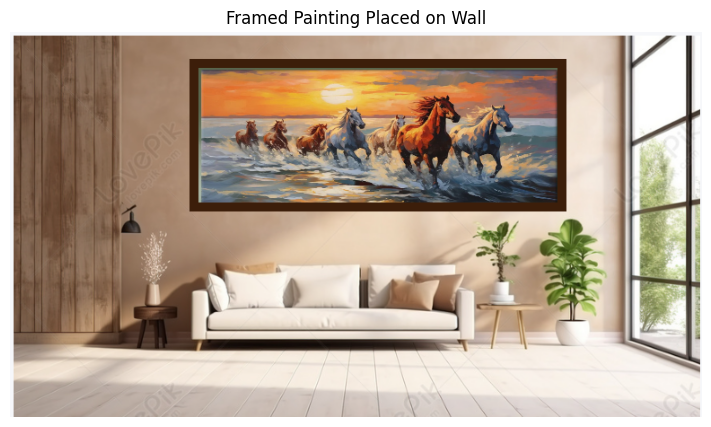

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
painting_path = "/content/SampleImg.png"  # Painting image
room_path = "/content/Living room.png"  # Lifestyle image

# Load painting and lifestyle image
painting = cv2.imread(painting_path, cv2.IMREAD_UNCHANGED)  # Load painting
room = cv2.imread(room_path)  # Load room image

# Check if images are loaded correctly
if painting is None:
    print("❌ Error: Painting image not found!")
    exit()
if room is None:
    print("❌ Error: Lifestyle image not found!")
    exit()

# Convert images to RGB (Matplotlib expects RGB format)
painting = cv2.cvtColor(painting, cv2.COLOR_BGR2RGB)
room = cv2.cvtColor(room, cv2.COLOR_BGR2RGB)

# Resize painting to fit within the available space
max_width = room.shape[1] - 100  # Ensure the painting doesn't exceed room width
new_width = min(400, max_width)  # Keep max width 400 or less
painting_resized = cv2.resize(painting, (new_width, 150))  # Adjust height as needed

# Add a frame (brown border)
frame_thickness = 10  # Adjust thickness if needed
frame_color = (60, 30, 10)  # Brownish frame color (RGB)
framed_painting = cv2.copyMakeBorder(
    painting_resized,
    frame_thickness, frame_thickness, frame_thickness, frame_thickness,
    cv2.BORDER_CONSTANT, value=frame_color
)

# New size after adding the frame
h, w, _ = framed_painting.shape

# Ensure the painting fits within the room boundaries
x_offset = min(200, room.shape[1] - w - 10)  # Prevent going out of bounds
y_offset = 30  # Keep it at a reasonable height

# Overlay painting on room
room[y_offset:y_offset+h, x_offset:x_offset+w] = framed_painting

# Display result
plt.figure(figsize=(10, 5))
plt.imshow(room)
plt.axis("off")
plt.title("Framed Painting Placed on Wall")
plt.show()
